## The Microsoft Sci-fi Project - A&J Analytica

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They also want to capture a niche and create only sci-fi movies. They have hired A&J Analytica to help them better understand the sci-fi genre. Your team is charged with doing data analysis and creating a presentation that explores what type of sci-fi films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

## Our approach:

We first looked for data on sci-fi movies that included indicators of success - i.e. revenue, popularity score and average voter score. Microsoft wants to create a successful movie so we needed to be able to quantify which movies were successful. We also sought data with certain characteristics of each film – i.e subgenre and rating. With those characteristics, we could further break down exactly what kind of sci-fi movie should be made for success.  All data that was pulled was for movies released in the 2000s since the movie that Microsoft is looking to make would align with the trends of 'current' movies.

Next, after compiling a dataset incorporating these indicators and characteristics for each sci-fi film, we were able to perform our analysis. We asked ourselves questions and tested out hypotheses to determine previous movies that were successful and look for trends in characteristics.


     
     



In [51]:
#import packages needed

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
from re import sub
from decimal import Decimal
import seaborn as sns
%matplotlib inline

In [3]:
#imported millions function for graph tick display of '$300m'

import warnings
warnings.filterwarnings("ignore")

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    #'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

import matplotlib.ticker as ticker

In [4]:
#merging data from TMDB API dataset and Movie Mojo webscraped dataset
#cleaning merged data by dropping unneeded columns & renaming columns

df1=pd.read_csv('mdbv2.csv',index_col=0)
df2=pd.read_csv('movie_subgenres.csv',index_col=0)
df1.reset_index(inplace=True)
df1.rename(columns={'title':'Title'},inplace=True)
sci_fi_df=pd.merge(df1,df2,on='Title')
sci_fi_df.rename(columns={'Lifetime_Gross': 'Revenue'},inplace=True)
sci_fi_df.rename(columns={'popularity': 'Popularity','vote_count':'Vote_Count', 
                          'vote_average': 'Vote_Average','release_date':'Release_Date'},inplace=True)
sci_fi_df.rename(columns={'genre':'Genre'},inplace=True)
sci_fi_df.drop(['mdb_id','Date_Released'],axis=1, inplace=True)
ratings_df=pd.read_csv('Ratings.csv')

In [5]:
#merging third dataset from OMDB for movie ratings
scifi_df=pd.merge(ratings_df,sci_fi_df,on='Title') 
scifi_df.columns

Index(['Unnamed: 0', 'Title', 'Rating', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Release_Date', 'Genre', 'Revenue', 'Subgenre'],
      dtype='object')

In [32]:
#cleaning full DF, dropping extra column
scifi_df.drop(columns='Unnamed: 0',inplace=True)

scifi_df #final DF with all three datasets merged 

,Title,Rating,Popularity,Vote_Count,Vote_Average,Release_Date,Genre,Revenue,Subgenre
0,Sunshine,R,23.118,2228,7.0,2007-04-05,sci-fi,3675753,Future
1,Prometheus,R,31.760,8222,6.4,2012-05-30,sci-fi,126477084,Robot
2,Prometheus,R,31.760,8222,6.4,2012-05-30,sci-fi,126477084,Future
3,Fantastic Four,PG-13,29.840,6401,5.7,2005-06-29,sci-fi,154696080,Superhero
4,Fantastic Four,PG-13,29.840,6401,5.7,2005-06-29,sci-fi,56117548,Superhero
...,...,...,...,...,...,...,...,...,...
283,Hellboy,PG-13,23.477,1722,5.3,2019-04-10,sci-fi,59623958,Superhero
284,The Incredible Hulk,PG-13,39.485,7322,6.2,2008-06-12,sci-fi,134806913,Superhero
285,Arrival,PG-13,36.084,11913,7.5,2016-11-10,sci-fi,100546139,Alien_Invasion
286,The Host,PG-13,13.322,3085,6.3,2013-03-22,sci-fi,26627201,Alien_Invasion


### What is the title,subgenre and rating of the sci-fi film with the highest generated revenue? How does this compare to the highest rated movie (using popularity score)?

Highest Revenue: Avengers: Endgame, Supernatural, PG-13

Highest Popularity Score: Spider-Man: Far From Home, Supernatural, PG-13

Both return a PG-13, Supernatural film. 

In [33]:
#return movie details for highest generated revenue
#return movie details for higest rated by vote average

scifi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False).head(1)
scifi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Popularity',ascending=False).head(1)

,Title,Rating,Popularity,Vote_Count,Vote_Average,Release_Date,Genre,Revenue,Subgenre
7,Spider-Man: Far from Home,PG-13,91.951,6800,7.5,2019-06-28,sci-fi,390532085,Supernatural


### What is the title, subgenre and rating of the sci-fi film with the lowest generated revenue? How does this compare to the lowest rated movie (using vote average)?

Lowest Revenue: Storage 24, Alien Invasion, R

Lowest Score: 1984, Future, R

In [22]:
#sorted by revenue and returned the title,revenue,subgenre,rating
#of the movie with the lowest generated revenue

scifi_df[['Title', 'Revenue','Subgenre','Rating']].drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=True).head(1)

#sorted by vote_average and returned the title,vote_average,subgenre,rating
#of the movie with the lowest generated revenue

scifi_df[['Title', 'Vote_Average','Subgenre','Rating']].drop_duplicates(subset='Title',inplace=False).sort_values(by='Vote_Average',ascending=True).head(1)

,Title,Vote_Average,Subgenre,Rating
175,1984,0.0,Future,R


### What does the average popularity score look like by subgenre?

Per the graph below, Supernatural has a higher average popularity score than other subgenres within Sci-Fi.

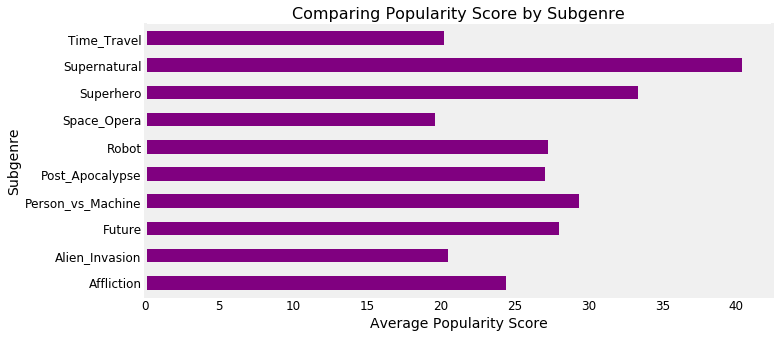

In [47]:
#plots each subgenre's average popularity score in a horizontal bar graph
#use of bar plot allows subgenres to be compared 

Avg_pop_by_sub=scifi_df.groupby('Subgenre')['Popularity'].mean()
Fig1=Avg_pop_by_sub.plot(kind='barh',figsize=(10,5),grid=False,color='purple')
Fig1.set_title('Comparing Popularity Score by Subgenre',fontdict={'size':16})
Fig1.set_xlabel('Average Popularity Score',fontdict={'size':14})
Fig1.set_ylabel('Subgenre',fontdict={'size':14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### How does each subgenre's average revenue compare?

Per the graph below, Supernatural films have a higher average revenue generated than other subgenres within Sci-Fi

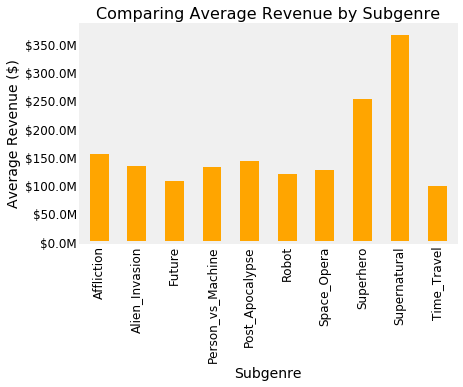

In [46]:
#plots each subgenre's revenue average in a vertical bar graph
#bar graph allows subgenre's to be compared


Avg_rev_by_sub=scifi_df.groupby('Subgenre')['Revenue'].mean()
Fig2=Avg_rev_by_sub.plot(kind='bar',grid=False,color='orange')
Fig2.set_title('Comparing Average Revenue by Subgenre',fontdict={'size':16})
Fig2.set_xlabel('Subgenre',fontdict={'size':14})
Fig2.set_ylabel('Average Revenue ($)',fontdict={'size':14})
Fig2.yaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [53]:
#exploring descriptive stats of the dataset
scifi_df.describe()

,Popularity,Vote_Count,Vote_Average,Revenue
count,288.000000,288.000000,288.000000,2.880000e+02
mean,28.006097,6424.965278,6.411806,1.698343e+08
std,16.298798,5242.019668,1.222467,1.708780e+08
min,0.600000,0.000000,0.000000,7.200000e+01
25%,16.040250,2059.250000,5.900000,4.389860e+07
50%,26.165500,5459.000000,6.600000,1.264771e+08
75%,37.971500,8903.750000,7.225000,2.339215e+08
max,91.951000,21978.000000,8.400000,8.583730e+08


In [50]:
#printing mean and median revenue of all sci-fi films
#this provides a good indicator if a film is 'above' average

print('Median: $', round(scifi_df.drop_duplicates(subset='Title')['Revenue'].mean()/1000000),'Million')
print('Mean: $',round(scifi_df.drop_duplicates(subset='Title')['Revenue'].median()/1000000),'Million')

Median: $ 138 Million
Mean: $ 91 Million


In [148]:
#setting all films' revenue median and mean to variables
#creating a variable for only supernatural films' revenue median to compare to the group
mean = scifi_df.drop_duplicates(subset='Title')['Revenue'].mean()
median = scifi_df.drop_duplicates(subset='Title')['Revenue'].median()
supernatural_median = scifi_df[scifi_df['Subgenre']=='Supernatural'].drop_duplicates(subset='Title')['Revenue'].median()

In [149]:
#supernatural's revenue median is above average for all sci-fi films
supernatural_median

329138327.0

### How does the central tendency and distribution of the revenue of all Sci-Fi films look?

Per the graphs below, the distribution is skewed slightly right due to a few films with revenue over $600m.  

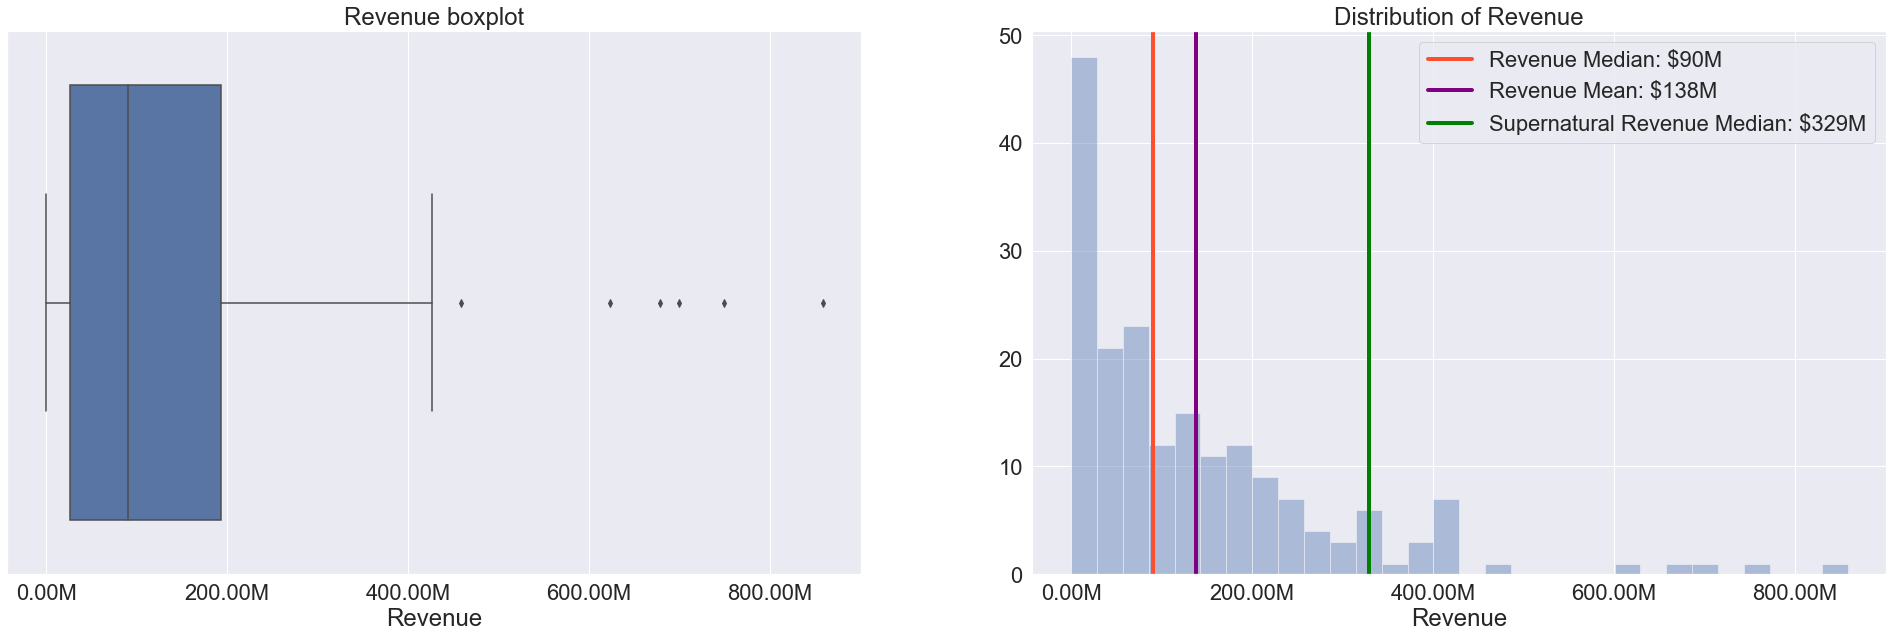

In [151]:
#plotting the revenue boxplot on the left for all films' revenue
#plotting a histogram of revenue on the right for all films

fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(30,10))
sns.set(font_scale=2)
sns.set_style("darkgrid")


sns.distplot(scifi_df.drop_duplicates(subset='Title')['Revenue'], bins=30, ax=ax2, kde=False).set_title('Distribution of Revenue')

sns.boxplot(scifi_df.drop_duplicates(subset='Title')['Revenue'], ax=ax).set_title('Revenue boxplot')

#adding in mean and median lines to distribution graph on the right
#this allows us to compare the subgenre of supernatural against all sci-fi films 

color ='#fc4f30'
plt.axvline(median, color=color, label='Revenue Median: $90M', linewidth=4)  #median line
plt.axvline(mean, color='purple', label='Revenue Mean: $138M', linewidth=4)
plt.axvline(supernatural_median, color='green', label='Supernatural Revenue Median: $329M', linewidth=4)
plt.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

plt.show()


### What is the correlation of revenue and popularity?

The popularity score and revenue of a film have a high correlation. 
Thus both are indicators of a successful film. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


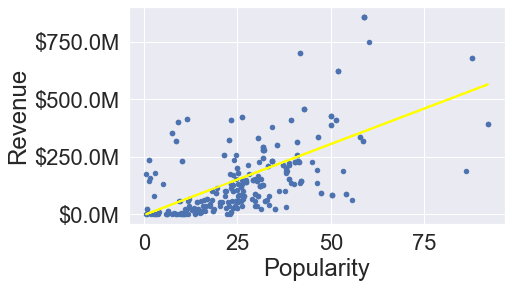

In [48]:
#scatterplot to show that popularity has a high correlation with revenue 

y = scifi_df.plot(kind='scatter',x='Popularity',y='Revenue')

m,b=np.polyfit(scifi_df['Popularity'], scifi_df['Revenue'], 1)
plt.plot(scifi_df['Popularity'], m*scifi_df['Popularity'] + b, linewidth = 2, color='yellow')

y.yaxis.set_major_formatter(formatter)

plt.show()

In [47]:
#calculating the correlation between revenue and popularity

scifi_df['Revenue'].corr(scifi_df['Popularity'])

0.5884113320857991

### What are the Top 10 highest grossing Sci-Fi Movies? How do the ratings and subgenres across the Top 10 compare?

The top 10 highest grossing films all had ratings of PG-13 and 80% fell under the subgenre of Supernatural.

In [15]:
#top 10 sci-fi movies determined by revenue 

top_10=scifi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False).head(10)
top_10_df=pd.DataFrame(top_10['Title'])
top_10_df.reset_index(inplace=True,drop=True)
top_10_df

,Title
0,Avengers: Endgame
1,Avatar
2,Black Panther
3,Avengers: Infinity War
4,The Avengers
5,Avengers: Age of Ultron
6,Captain Marvel
7,The Hunger Games: Catching Fire
8,Wonder Woman
9,Iron Man 3


In [18]:
#this shows the value counts of rating across the top 10 films
top_10['Rating'].value_counts()

PG-13    10
Name: Rating, dtype: int64

In [16]:
#this shows the value counts of subgenre across the top 10 films
top_10['Subgenre'].value_counts()

Supernatural       8
Affliction         1
Post_Apocalypse    1
Name: Subgenre, dtype: int64

## Final Thoughts & Summary:

Per the graph below, Microsoft should create a PG-13, Supernatural film to capture the sci-fi market.  The combination of Supernatural PG-13 films perform above average of all sci-fi films in terms of revenue and popularity. 

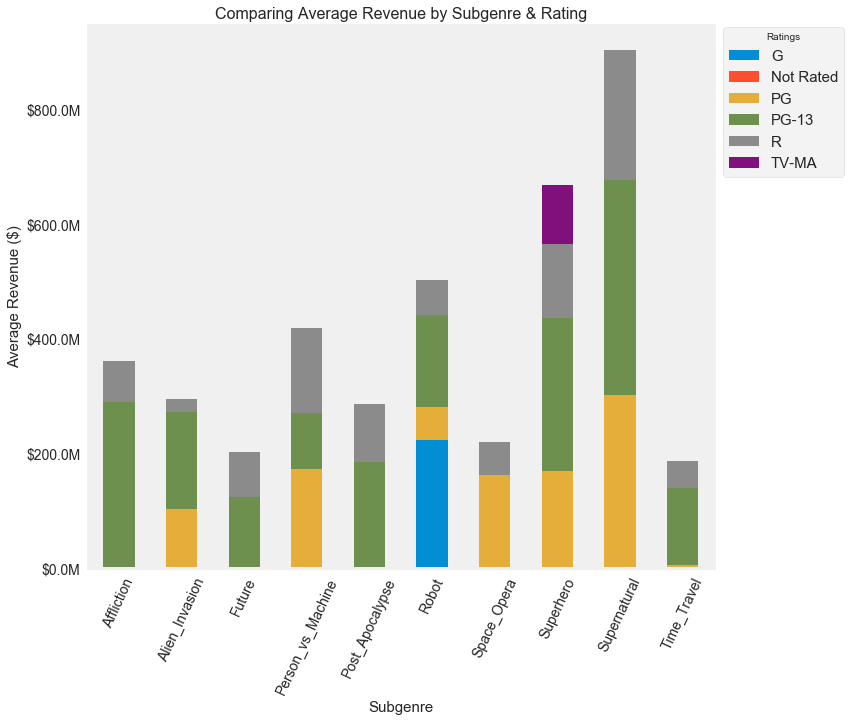

In [80]:
#final graph summarizing findings from EDA
#plot the revenue average of each subgenre and stacked rating


Avg_rev_by_ratings=scifi_df.groupby(['Subgenre','Rating'])['Revenue'].mean().unstack()
Fig100=Avg_rev_by_ratings.plot(kind='bar',grid=False,stacked=True,figsize=(10,10))
Fig100.set_title('Comparing Average Revenue by Subgenre & Rating',fontdict={'size':16})
Fig100.set_xlabel('Subgenre',fontdict={'size':15})
Fig100.set_ylabel('Average Revenue ($)',fontdict={'size':15})
Fig100.yaxis.set_major_formatter(formatter)
plt.xticks(fontsize=14,rotation=65)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.22,1.01),title="Ratings",frameon=True,fontsize=15)

plt.show()